In [ ]:
import os
import requests

# Base URLs
pbf_base_url = "https://download.geofabrik.de/europe/united-kingdom/"
poly_base_url = "https://download.geofabrik.de/europe/united-kingdom/"

# List of regions
regions = [
    "bedfordshire", "berkshire", "bristol", "buckinghamshire", "cambridgeshire", 
    "cheshire", "cornwall", "cumbria", "derbyshire", "devon", "dorset", "durham", 
    "east-sussex", "east-yorkshire-with-hull", "essex", "gloucestershire", 
    "greater-london", "greater-manchester", "hampshire", "herefordshire", 
    "hertfordshire", "isle-of-wight", "kent", "lancashire", "leicestershire", 
    "lincolnshire", "merseyside", "norfolk", "north-yorkshire", "northamptonshire", 
    "northumberland", "nottinghamshire", "oxfordshire", "rutland", "shropshire", 
    "somerset", "south-yorkshire", "staffordshire", "suffolk", "surrey", 
    "tyne-and-wear", "warwickshire", "west-midlands", "west-sussex", 
    "west-yorkshire", "wiltshire", "worcestershire", "wales"
]

# Target date
dates = []
for y in range(15, 25):
    dates.append(f"{y}0101")

# Create directories
os.makedirs("pbfs", exist_ok=True)
os.makedirs("polys", exist_ok=True)

# Download pbf files
for date in dates:
    os.makedirs(os.path.join("pbfs", date), exist_ok=True)
    for region in regions:
        try:
            # PBF file
            pbf_file_name = f"{region}-{date}.osm.pbf"
            if region == "wales":
                pbf_url = f"{pbf_base_url}{pbf_file_name}"
            else:
                pbf_url = f"{pbf_base_url}england/{pbf_file_name}"
            pbf_path = os.path.join("pbfs", date, pbf_file_name)
            if os.path.exists(pbf_path):
                continue
            print(f"Downloading {pbf_url}...")
            pbf_response = requests.get(pbf_url)
            if pbf_response.status_code == 200:
                with open(pbf_path, "wb") as f:
                    f.write(pbf_response.content)
                print(f"Saved: {pbf_path}")
            else:
                print(f"Failed to download {pbf_url}, status code: {pbf_response.status_code}")

        except Exception as e:
            print(f"Error downloading files for {region}: {e}")

# Poly file
for region in regions: 
    poly_file_name = f"{region}.poly"
    if region == "wales":
        poly_url = f"{poly_base_url}{region}.poly"
    else:
        poly_url = f"{poly_base_url}england/{region}.poly"
    poly_path = os.path.join("polys", poly_file_name)
    print(f"Downloading {poly_url}...")
    poly_response = requests.get(poly_url)
    if poly_response.status_code == 200:
        with open(poly_path, "w", encoding="utf-8") as f:
            f.write(poly_response.text)
        print(f"Saved: {poly_path}")
    else:
        print(f"Failed to download {poly_url}, status code: {poly_response.status_code}")

print("Download completed!")

Saved: polys\wales.poly
Download completed!


Reading polys\bedfordshire-240101.poly...
Reading polys\berkshire-240101.poly...
Reading polys\bristol-240101.poly...
Reading polys\buckinghamshire-240101.poly...
Reading polys\cambridgeshire-240101.poly...
Reading polys\cheshire-240101.poly...
Reading polys\cornwall-240101.poly...
Reading polys\cumbria-240101.poly...
Reading polys\derbyshire-240101.poly...
Reading polys\devon-240101.poly...
Reading polys\dorset-240101.poly...
Reading polys\durham-240101.poly...
Reading polys\east-sussex-240101.poly...
Reading polys\east-yorkshire-with-hull-240101.poly...
Reading polys\essex-240101.poly...
Reading polys\gloucestershire-240101.poly...
Reading polys\greater-london-240101.poly...
Reading polys\greater-manchester-240101.poly...
Reading polys\hampshire-240101.poly...
Reading polys\herefordshire-240101.poly...
Reading polys\hertfordshire-240101.poly...
Reading polys\isle-of-wight-240101.poly...
Reading polys\kent-240101.poly...
Reading polys\lancashire-240101.poly...
Reading polys\leicesters

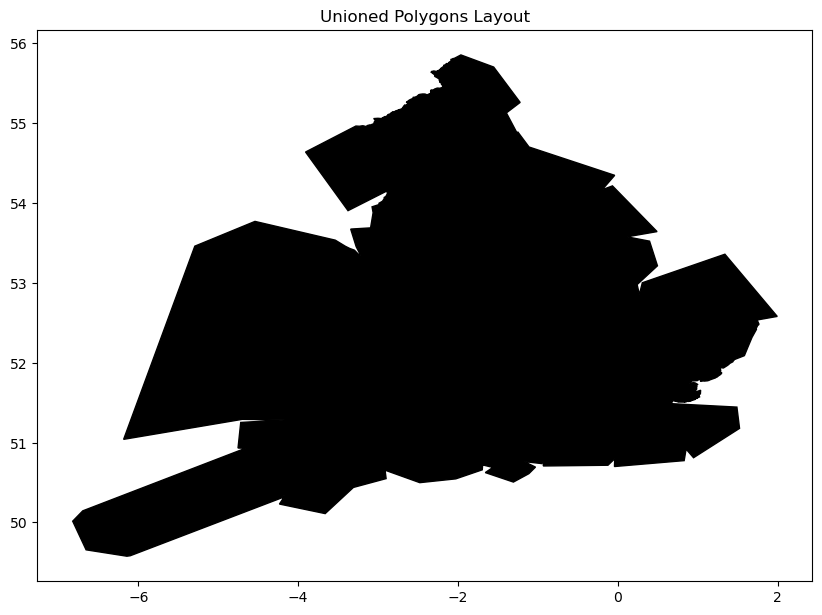

In [1]:
import os
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Directory containing .poly files
poly_dir = "polys"

def read_poly(file_path):
    """
    Reads a .poly file and converts it to a Shapely Polygon or MultiPolygon.
    Handles extra lines like 'none', '1', and ensures proper polygon closure.
    """
    polygons = []
    current_coords = []
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if line.lower() == "none" or line.isdigit() or line == "END":
                # Ignore non-coordinate lines and handle closing of current polygons
                if current_coords:
                    polygons.append(Polygon(current_coords))
                    current_coords = []
            elif line:  # Non-empty line
                try:
                    # Parse coordinates
                    coords = tuple(map(float, line.split()))
                    current_coords.append(coords)
                except ValueError:
                    # Ignore lines that cannot be parsed as coordinates
                    pass
    return MultiPolygon(polygons) if len(polygons) > 1 else polygons[0]

# Read and union all polygons
all_polys = []
for file_name in os.listdir(poly_dir):
    if file_name.endswith(".poly"):
        file_path = os.path.join(poly_dir, file_name)
        print(f"Reading {file_path}...")
        poly = read_poly(file_path)
        if poly:
            all_polys.append(poly)

# Union all polygons
unioned_poly = unary_union(all_polys)

# Plot the unioned polygon
fig, ax = plt.subplots(figsize=(10,10))
if isinstance(unioned_poly, MultiPolygon):
    for geom in unioned_poly.geoms:
        x, y = geom.exterior.xy
        ax.fill(x, y, color="black", alpha=1.0)
else:
    x, y = unioned_poly.exterior.xy
    ax.fill(x, y, color="black", alpha=1.0)

ax.set_aspect("equal")
ax.set_title("Unioned Polygons Layout")
plt.show()